# Machine Learning Project on Classification
### This project focuses on classifying different crop types using a fused optical-radar dataset collected from remote sensing images. The task involves applying machine learning techniques to accurately identify crop types based on spectral, polarimetric, and textural features.


In [ ]:
!pip install seaborn
!pip install imblearn

## Importing neccessary library

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


## 1. Data Exploration

### 1.1 Understand Dataset Composition


In [ ]:
# Basic data manipulation and analysis
import pandas as pd

# Load the dataset
file_path = 'WinnipegDataset.txt'
df = pd.read_csv(file_path, sep=",")

# Display basic information
print("Dataset Information:")
df.info()

# Display first few rows
print("\nFirst few rows of data:")
print(df.head())

# Basic statistics
print("\nStatistical Summary:")
print(df.describe())

# Save to CSV
output_path = 'WinnipegDataset.csv'
df.to_csv(output_path, index=False)
print(f"\nDataset saved to {output_path}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 435.0 MB

First few rows of data:
   label      f1      f2       f3      f4      f5      f6      f7      f8  \
0      1 -13.559 -21.407 -11.4040 -15.248 -11.923 -15.291 -2.1548 -7.8474   
1      1 -12.802 -20.335 -10.3990 -14.132 -11.096 -14.361 -2.4039 -7.5330   
2      1 -12.431 -19.902 -10.0740 -13.598 -10.829 -14.048 -2.3566 -7.4717   
3      1 -12.689 -19.529 -10.0280 -13.350 -11.056 -14.014 -2.6611 -6.8396   
4      1 -12.686 -19.278  -9.8185 -13.108 -10.932 -13.939 -2.8675 -6.5919   

        f9  ...     f165     f166    f167      f168     f169     f170  \
0 -10.0020  ...  0.18519  0.72602  5.3333  6.000000  0.29489  9.77780   
1  -9.9369  ...  0.33333 -0.48751  2.1111  0.098765  0.83333  0.33333   
2  -9.8283  ...  0.25926  0.25298  2.2222  0.172840  0.68889  0.88889   
3  -9.5006  ...  0.16049  0.437

### Check whether there is a missing value in dataset

In [ ]:
print(df.isnull().sum())

label    0
f1       0
f2       0
f3       0
f4       0
        ..
f170     0
f171     0
f172     0
f173     0
f174     0
Length: 175, dtype: int64


### Check the Crop Distribution for each Crop Types

In [ ]:
df["label"].value_counts()

label
6    85074
3    75673
4    74067
5    47117
1    39162
2     3598
7     1143
Name: count, dtype: int64

### The dataset shows a significant class imbalance, with class 6 having the highest frequency (85,074 samples) and class 7 the lowest (1,143 samples). This imbalance could lead to biased model predictions, where the model may favor the majority classes and underperform on the minority ones.

In [ ]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Find the column with the maximum number of missing values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()

print(f"Column with the highest missing values: {max_missing_column}")
print(f"Number of missing values in {max_missing_column}: {max_missing_count}")


Column with the highest missing values: label
Number of missing values in label: 0


### Checking and Understanding Columns with `int64` Data Type and Their Unique Values

In [ ]:
# Print the columns with int64 data type to check them
print(df.select_dtypes(include=['int64']).columns)

# Display the unique values in these columns to understand their meaning
for col in df.select_dtypes(include=['int64']).columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")
# print(  df['label'].unique())



Index(['label', 'f137', 'f138', 'f139', 'f140', 'f141'], dtype='object')
Unique values in column 'label': [1 2 3 4 5 6 7]
Unique values in column 'f137': [6711 6274 6215 ... 5547 7649 7980]
Unique values in column 'f138': [6143 5084 5035 ... 4472 4507 4468]
Unique values in column 'f139': [4570 3297 3033 ... 2296 2259 2219]
Unique values in column 'f140': [5064 3777 3837 ... 7613 7251 7075]
Unique values in column 'f141': [8212 8214 8588 ... 4954 5138 5475]


### Checking the data type for the label column which is the target dependent variable

In [ ]:
print(df['label'].dtype)

int64


### To avoid inconsistency converting integer data columns into float as most of columns are already in float

In [ ]:
# Convert columns f137, f138, f139, f140, f141 to float type
df[['f137', 'f138', 'f139', 'f140', 'f141']] = df[['f137', 'f138', 'f139', 'f140', 'f141']].astype(float)

# Check the data types to confirm the conversion
print(df[['f137', 'f138', 'f139', 'f140', 'f141']].dtypes)


f137    float64
f138    float64
f139    float64
f140    float64
f141    float64
dtype: object


## 1.2 Clustering for Preliminary Insights

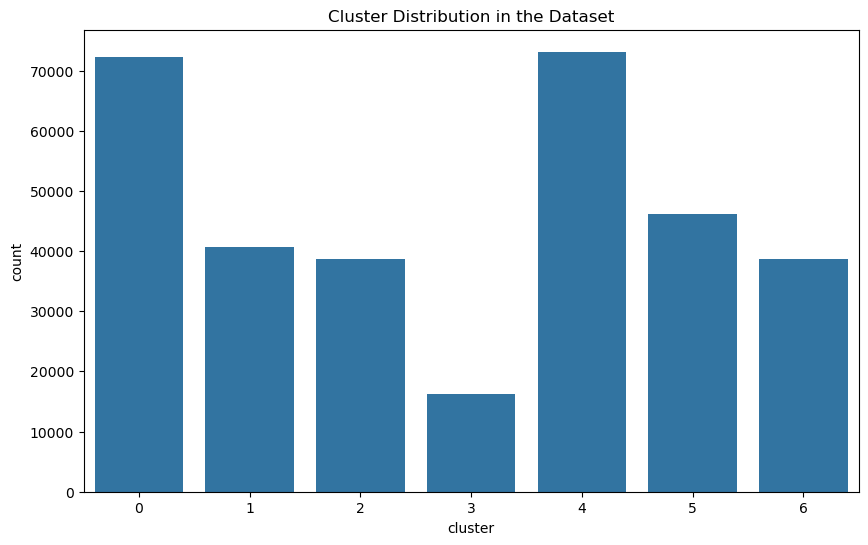

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
features = df.drop(columns=['label'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Cluster Distribution in the Dataset')
plt.show()


The cluster distribution plot shows that:

Clusters 0 and 4 have significantly higher counts than the other clusters, suggesting that a large portion of the data falls into these groupings.
Cluster 3 has the lowest count, which might represent either a smaller, unique subset of crop types or an outlier group with distinct characteristics.
This initial clustering could indicate natural groupings in the data, possibly related to the crop types. However, further analysis with respect to the actual crop labels could validate if these clusters align with specific crops or just data patterns. This clustering analysis will help us understand the data's inherent structure, which might guide the classification model's feature selection and preprocessing steps.

## 1.3 Visualize Feature Distributions

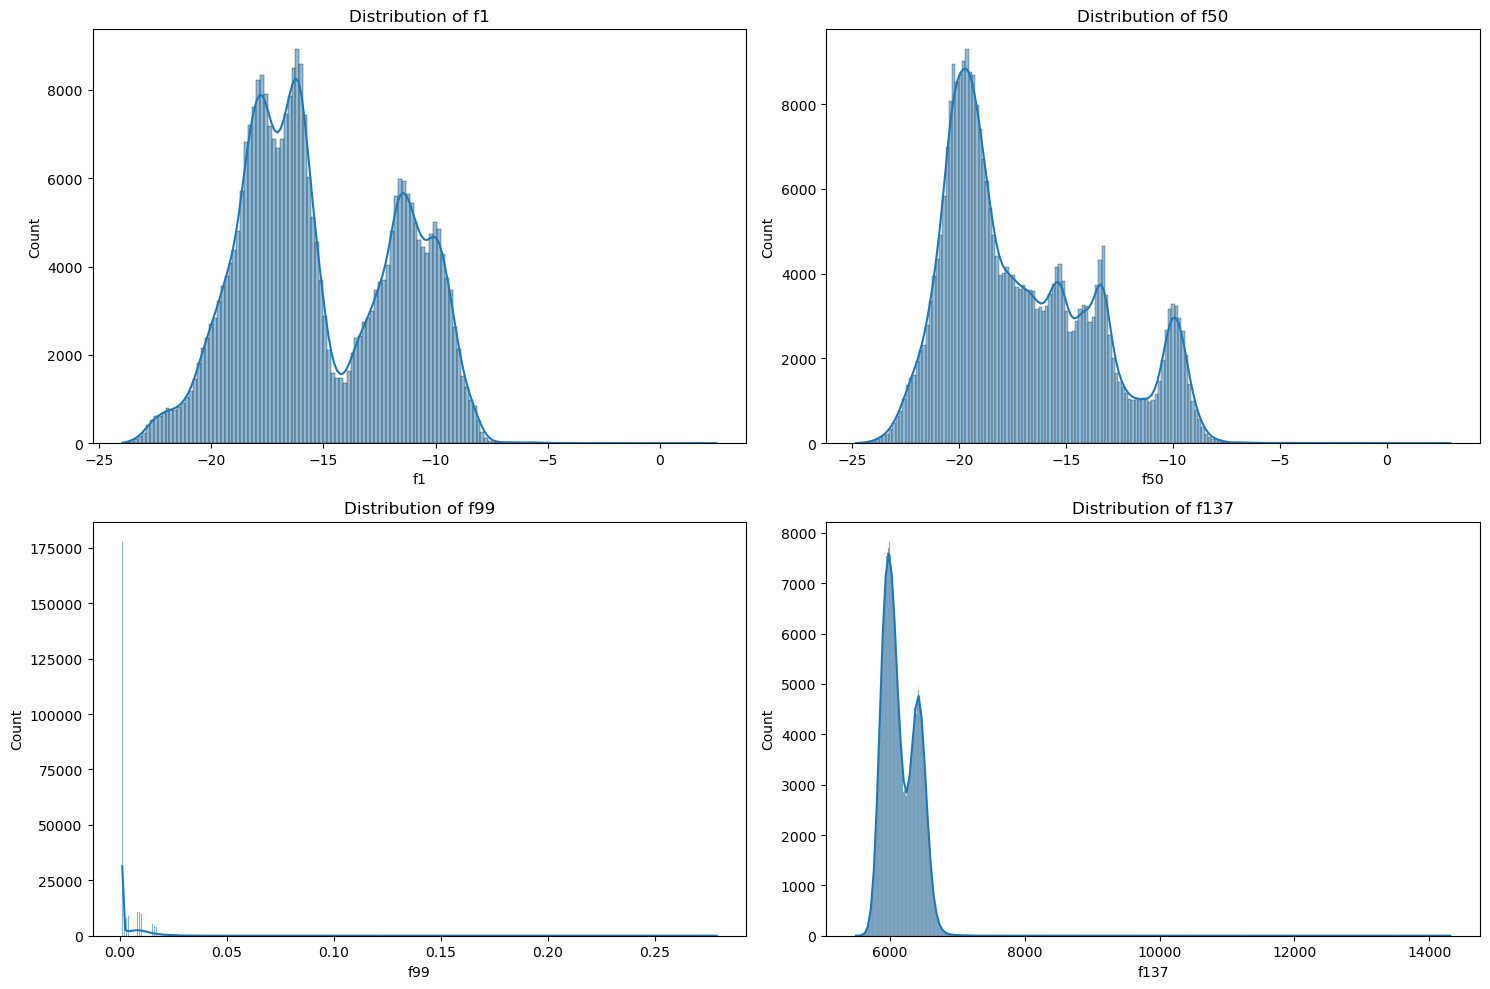

In [ ]:
# Plot distributions for a sample of features
sample_features = ['f1', 'f50', 'f99', 'f137']  # Adjust features as representative
plt.figure(figsize=(15, 10))

for i, feature in enumerate(sample_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### Code to Examine Crop Distribution in Clusters

The distribution of selected features (f1, f50, f99, f137) provides insights into the data characteristics for both radar and optical measurements:

Features f1 and f50 (presumably radar data on different dates) show multi-modal distributions. This could reflect different crop types with distinct radar reflectance patterns. The peaks in these distributions might correspond to different crop characteristics or growth stages captured by radar.
Feature f99 (likely an optical feature) is heavily skewed with most values concentrated near zero, suggesting limited variability. This could indicate that this feature might not strongly differentiate crop types, or it could require transformation (e.g., log transformation) to improve its utility.
Feature f137 shows a bi-modal distribution, which might also reflect separable characteristics among certain crop types based on optical data.

### Distribution of Crop Types within Each Cluster

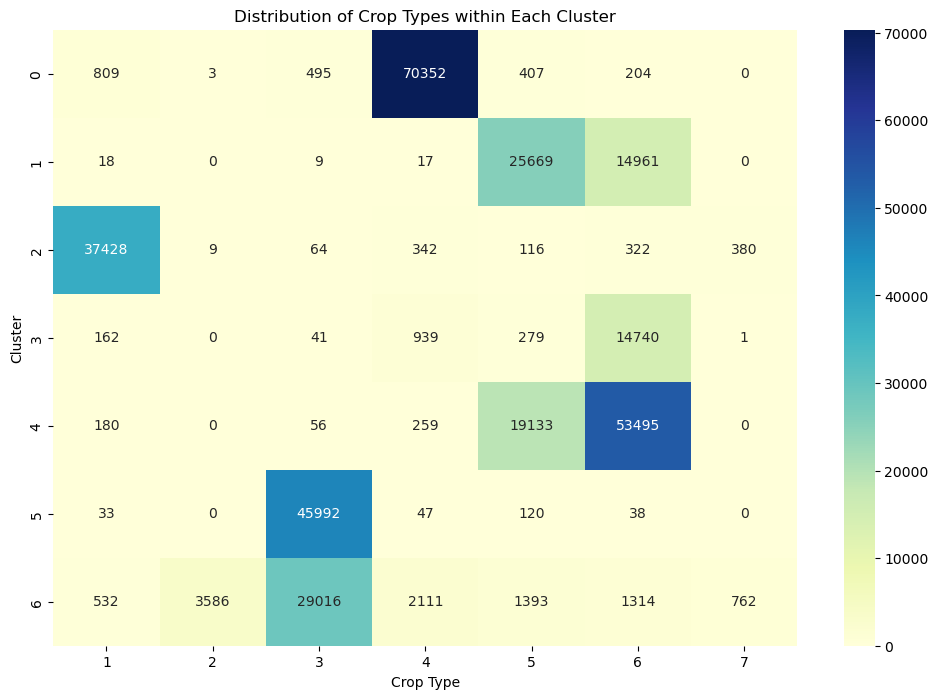

In [ ]:
# 'label' is the column representing crop types and 'cluster' represents the assigned cluster
# Plotting the distribution of crop labels within each cluster

# Count the occurrences of each crop type within each cluster
cluster_label_distribution = df.groupby(['cluster', 'label']).size().unstack(fill_value=0)

# Plot the distribution of crop labels within clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_label_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribution of Crop Types within Each Cluster")
plt.xlabel("Crop Type")
plt.ylabel("Cluster")
plt.show()


## 2. Data Preprocessing and Feature Engineering

There’s some overlap among other crop types, but the distinct peaks for specific crops indicate that these radar-based difference features could be valuable for classification.

### Correlation Analysis

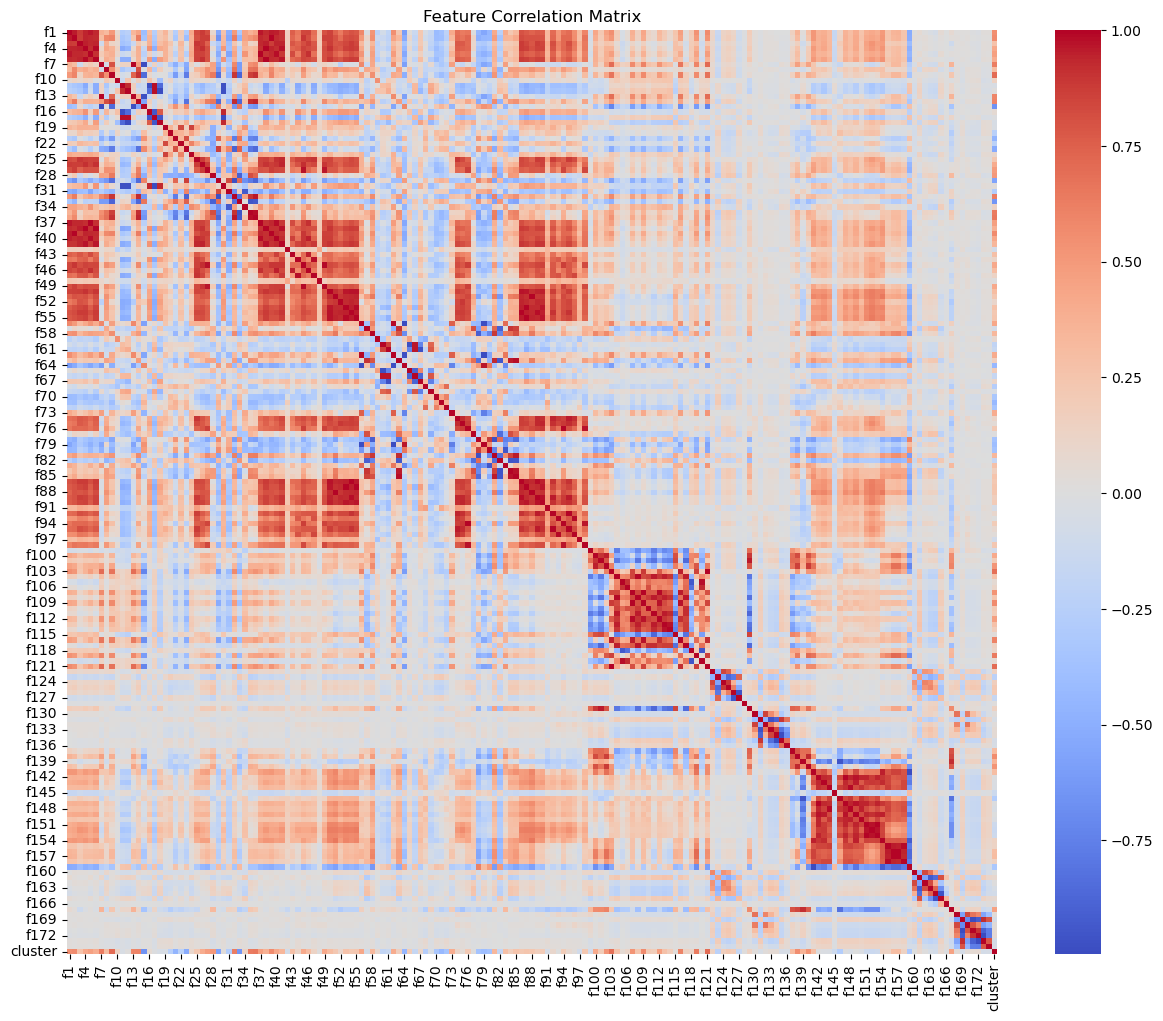

In [ ]:
# Calculate the correlation matrix for all features, excluding the label column
correlation_matrix = df.drop(columns=['label']).corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()


###  Principal Component Analysis (PCA)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA


# Separate features and labels

X = df.drop(columns=['label','cluster'])
y = df['label']

# Impute missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Verify that there are no more missing values
print("Missing values after imputation:")
print(X.isnull().sum())


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Missing values after imputation:
f1      0
f2      0
f3      0
f4      0
f5      0
       ..
f170    0
f171    0
f172    0
f173    0
f174    0
Length: 174, dtype: int64


In [ ]:

# Apply PCA to reduce dimensions, retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components selected: {pca.n_components_}")


Number of components selected: 33


In [ ]:
X.shape

(325834, 174)

In [ ]:
X_scaled.shape

(325834, 174)

In [ ]:
X_pca.shape

(325834, 33)

In [ ]:
print("Columns in X after dropping 'label':", X.columns)


Columns in X after dropping 'label': Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173',
       'f174'],
      dtype='object', length=174)


### Check for null values within dependent variable

In [ ]:
# Check for any NaN values in X
if X.isnull().values.any():
    print("There are NaN values in X.")
else:
    print("No NaN values in X.")

# Optionally, display the count of NaN values per column (for further inspection)
nan_counts = X.isnull().sum()
print("\nNaN values per column in X:")
print(nan_counts[nan_counts > 0])  # Only show columns with NaN values


No NaN values in X.

NaN values per column in X:
Series([], dtype: int64)


### Explained Variance by Number of Principal Components

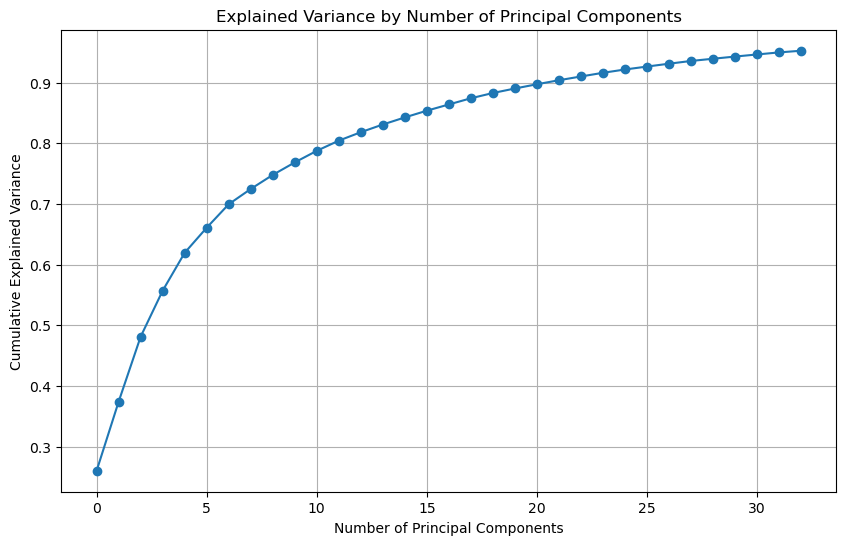

In [ ]:
# Plot explained variance to determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


### Check for Missing Values:

In [ ]:
print(df.isnull().sum())

label      0
f1         0
f2         0
f3         0
f4         0
          ..
f171       0
f172       0
f173       0
f174       0
cluster    0
Length: 176, dtype: int64


### To check the data type of each column in your DataFrame

In [ ]:
print(df.dtypes)

label        int64
f1         float64
f2         float64
f3         float64
f4         float64
            ...   
f171       float64
f172       float64
f173       float64
f174       float64
cluster      int32
Length: 176, dtype: object


###   The dataset consists of one target column 'label' (int64) and 174 feature columns (float64).This confirms that all features are in numeric format, suitable for scaling and model training. No need for Label/ One Hot Encoding



In [ ]:
print(df['label'].dtype)  # Check data type of the 'label' column
print(df['label'].unique())  # Check unique values to ensure all classes are represented


int64
[1 2 3 4 5 6 7]


## 3. Model Training

### Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Handling Class Imbalance with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the resampled dataset
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", pd.Series(y_train_resampled).value_counts())

Original dataset shape: label
6    68160
3    60562
4    59209
5    37690
1    31243
2     2890
7      913
Name: count, dtype: int64
Resampled dataset shape: label
6    68160
1    68160
4    68160
3    68160
5    68160
2    68160
7    68160
Name: count, dtype: int64


### SMOTE (Synthetic Minority Over-sampling Technique) is applied to balance the class distribution by generating synthetic samples for minority classes in the training set. This ensures better model performance on imbalanced datasets.

In [ ]:
y_train.shape

(260667,)

In [ ]:
y_test.shape

(65167,)

In [ ]:
# Display the first few rows of X_test
print("First few rows of X_test:")
print(X_test[:5])  # Display the first 5 rows of X_test

First few rows of X_test:
[[ 5.72619592e-01  6.35644600e-01  1.36757536e+00  9.56947482e-01
   1.04216490e+00  8.18973190e-01 -1.46399977e+00  4.74265594e-01
  -9.44744965e-01  9.07903775e-01 -1.52611602e-01  2.03008527e-01
  -1.48933328e+00 -5.65816358e-01  1.45610320e+00  2.81165903e-01
   5.27231623e-02 -3.54523509e-01  1.33689483e+00  1.15527791e+00
   1.06933029e+00  1.46088924e+00  8.36666592e-01  1.14936349e+00
   8.01767772e-01  2.46533580e-01 -6.11889129e-02 -1.58213851e+00
   2.44083208e-01  4.98351867e-02 -7.47446355e-01 -5.64798078e-01
   1.37147810e+00  7.97080773e-01 -9.77701000e-01 -8.44891239e-01
   1.04216490e+00  9.34760075e-01  6.35644600e-01  9.32221171e-01
   7.10015534e-01  2.21339977e-01  1.54284936e+00 -4.47000338e-02
   2.36947093e-01  1.22548600e+00  2.78277857e-01 -9.54545232e-02
   1.18331217e-01 -8.16932258e-01 -5.23763498e-01 -9.98420311e-01
  -7.97082870e-01 -1.03413029e+00 -6.55420616e-01  1.48973908e-01
   4.98347790e-01  5.60498098e-01 -7.41539968e-01 

### Training Random Forest Classification Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model on the resampled data
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)
# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9962557736277564


### Confusion Matrix for Random Forest Classifier

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
# Retrieve the order of class labels used in the confusion matrix
labels = rf_model.classes_

# Print the labels
print("Labels in order (corresponding to rows/columns in confusion matrix):")
print(labels)

[[ 7895     0     3    12     1     1     7]
 [    0   708     0     0     0     0     0]
 [    2     0 15087     7     8     7     0]
 [   10     0    11 14807    21     9     0]
 [    3     0     3    25  9353    36     7]
 [    5     2     3    15    39 16847     3]
 [    2     0     0     0     1     1   226]]
Labels in order (corresponding to rows/columns in confusion matrix):
[1 2 3 4 5 6 7]


In [ ]:
# Check the shape of X_test
print(f"Shape of X_test: {X_test.shape}")

Shape of X_test: (65167, 174)


In [ ]:
print(f"Shape of X_test: {X_test}")

Shape of X_test: [[ 0.57261959  0.6356446   1.36757536 ... -0.83993826  0.85943703
   0.70541374]
 [-0.08857769 -0.42547508 -0.48287578 ... -0.83993826  0.85943703
   0.70541374]
 [ 1.10796966  0.826804    0.30418562 ...  0.59080927 -0.94387067
  -2.02283111]
 ...
 [ 1.00951775  1.10528009  2.13196132 ...  0.26330105 -0.40287471
   0.70541374]
 [ 0.65908605  0.52637542  0.6729294  ... -0.83993826  0.85943703
   0.70541374]
 [ 1.05603271  1.31592541  0.55878714 ... -0.83993826  0.85943703
   0.70541374]]


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))


Accuracy: 0.9901176976076849
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      7919
           2       0.99      1.00      1.00       708
           3       1.00      1.00      1.00     15111
           4       0.99      0.99      0.99     14858
           5       0.97      0.98      0.98      9427
           6       0.99      0.99      0.99     16914
           7       0.90      0.97      0.93       230

    accuracy                           0.99     65167
   macro avg       0.98      0.99      0.98     65167
weighted avg       0.99      0.99      0.99     65167



### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)


# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))


Accuracy: 0.9971457946506668
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7919
           2       0.99      1.00      0.99       708
           3       1.00      1.00      1.00     15111
           4       1.00      1.00      1.00     14858
           5       0.99      1.00      0.99      9427
           6       1.00      1.00      1.00     16914
           7       0.90      0.99      0.94       230

    accuracy                           1.00     65167
   macro avg       0.98      1.00      0.99     65167
weighted avg       1.00      1.00      1.00     65167



###  Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.9882302392315129
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      7919
           2       0.98      1.00      0.99       708
           3       1.00      1.00      1.00     15111
           4       0.99      0.99      0.99     14858
           5       0.97      0.97      0.97      9427
           6       0.99      0.99      0.99     16914
           7       0.93      0.93      0.93       230

    accuracy                           0.99     65167
   macro avg       0.98      0.98      0.98     65167
weighted avg       0.99      0.99      0.99     65167



### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.9161078459956726
              precision    recall  f1-score   support

           1       0.97      0.96      0.97      7919
           2       0.93      0.97      0.95       708
           3       0.98      0.98      0.98     15111
           4       0.97      0.97      0.97     14858
           5       0.73      0.90      0.80      9427
           6       0.95      0.79      0.86     16914
           7       0.30      0.98      0.47       230

    accuracy                           0.92     65167
   macro avg       0.83      0.94      0.86     65167
weighted avg       0.93      0.92      0.92     65167



### Artificial Neural Network (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
ann_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_ann = ann_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
print(classification_report(y_test, y_pred_ann))


Accuracy: 0.9976214955422222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7919
           2       1.00      1.00      1.00       708
           3       1.00      1.00      1.00     15111
           4       1.00      1.00      1.00     14858
           5       1.00      0.99      1.00      9427
           6       1.00      1.00      1.00     16914
           7       0.97      0.98      0.97       230

    accuracy                           1.00     65167
   macro avg       0.99      1.00      0.99     65167
weighted avg       1.00      1.00      1.00     65167



### Confusion Matrix Visualization for Artificial Neural Network

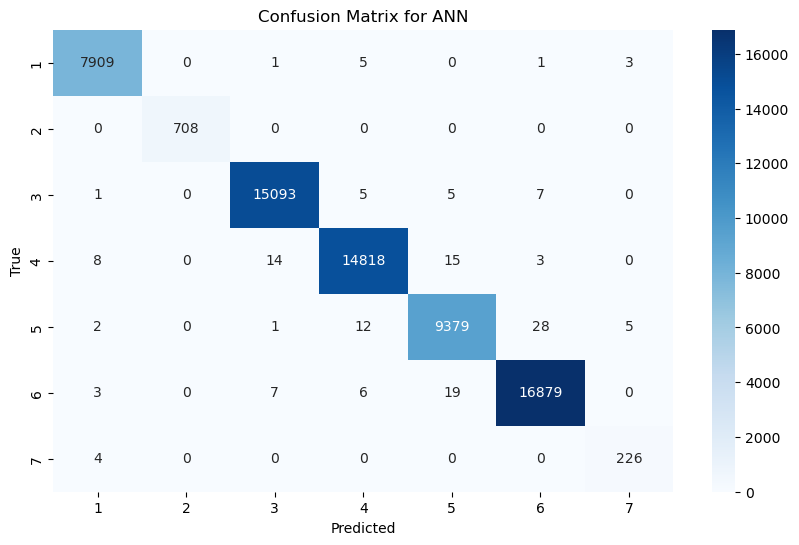

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Confusion Matrix Visualization for Random Forest

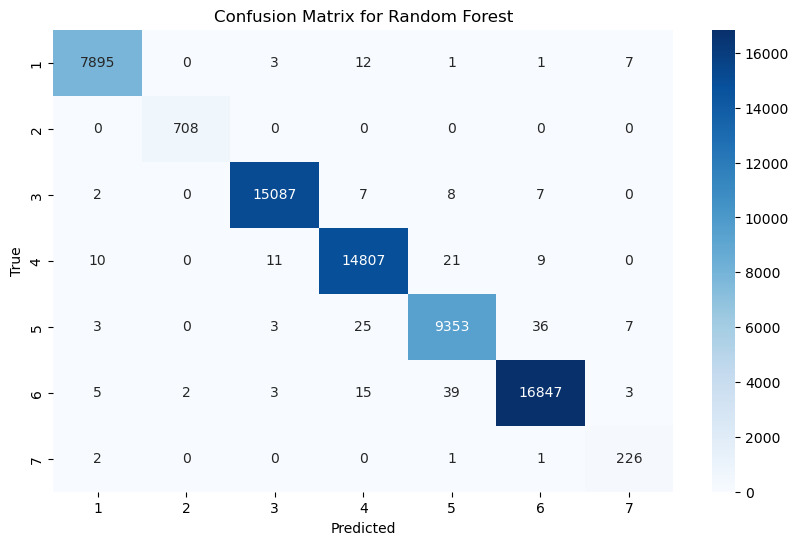

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Confusion Matrix Visualization for Logistic Regression

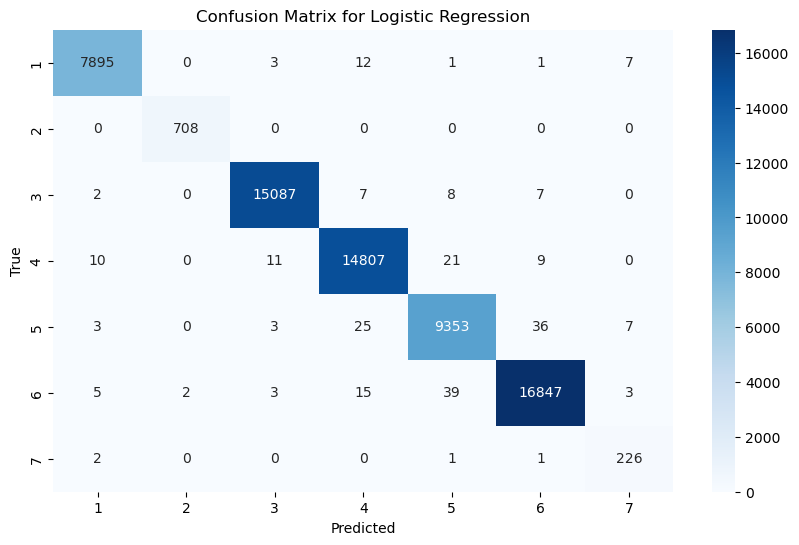

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Confusion Matrix Visualization for K-Nearest Neighbors

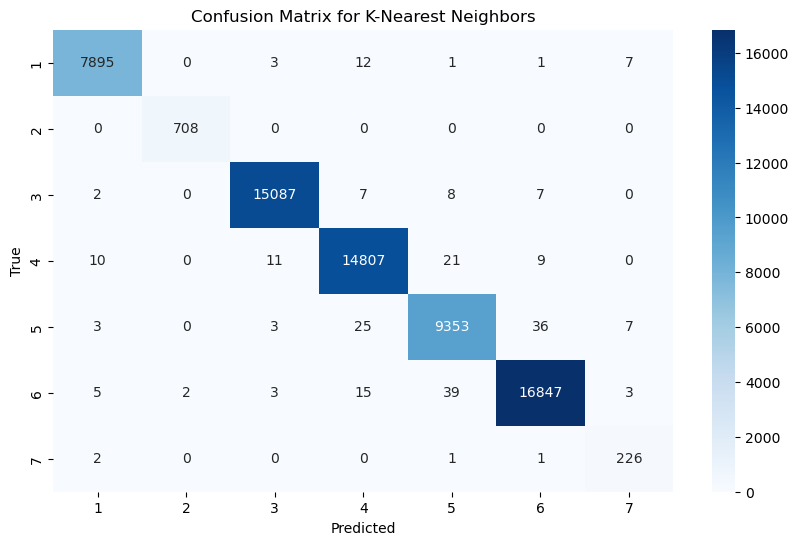

In [ ]:
# Confusion Matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Confusion Matrix Visualization for Decision Tree

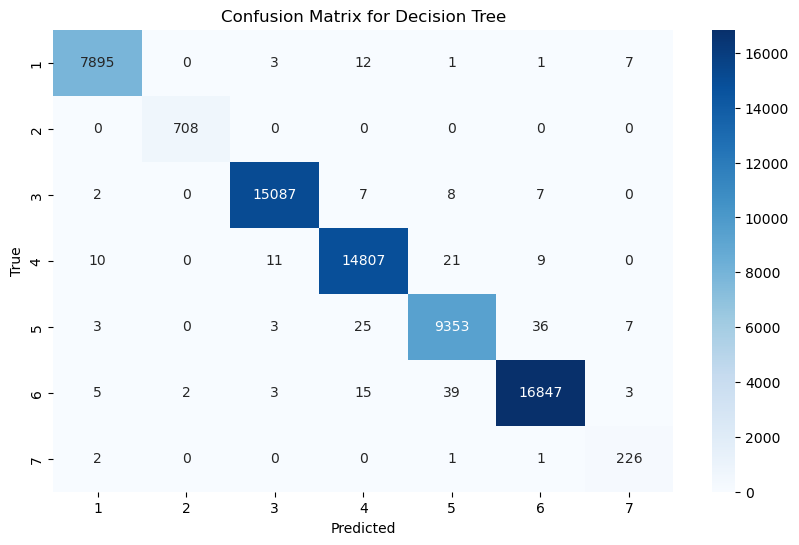

In [ ]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Confusion Matrix Visualization for Naive Bayes

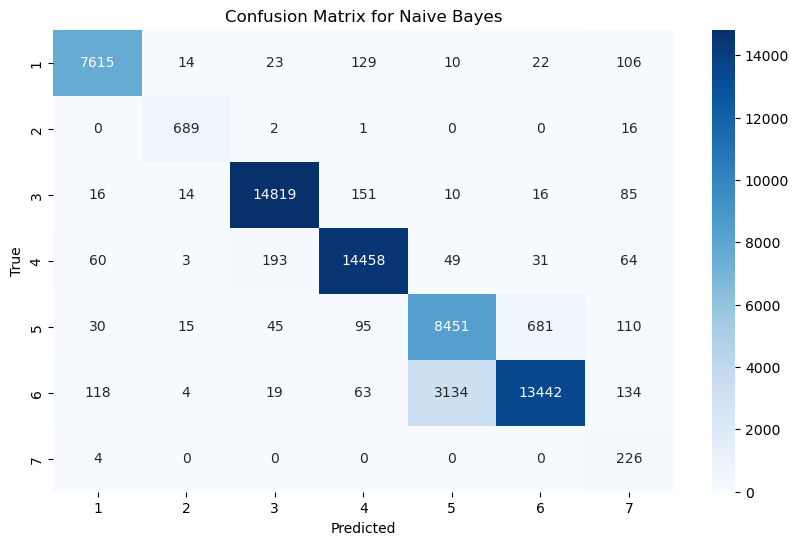

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## 4. Result Analysis and Visualization

### Cross-Validation for Each Model

In [ ]:
from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = [
    (RandomForestClassifier(random_state=42), "Random Forest"),
    # (LogisticRegression(max_iter=1000, random_state=42), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors (KNN)"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (GaussianNB(), "Naive Bayes"),
    (MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42), "Artificial Neural Network (ANN)")
]

# Perform cross-validation for all models
for model, name in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"--- {name} ---")
    print(f"Cross-validation score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print("-" * 50)


--- Random Forest ---
Cross-validation score: 0.9722 ± 0.0176
--------------------------------------------------
--- K-Nearest Neighbors (KNN) ---
Cross-validation score: 0.6931 ± 0.0249
--------------------------------------------------
--- Decision Tree ---
Cross-validation score: 0.9429 ± 0.0233
--------------------------------------------------
--- Naive Bayes ---
Cross-validation score: 0.8400 ± 0.0389
--------------------------------------------------
--- Artificial Neural Network (ANN) ---
Cross-validation score: 0.8193 ± 0.0574
--------------------------------------------------


### Comparing Test and Train Accuracy for Random Forest

In [ ]:
# Training vs Testing Accuracy
from sklearn.metrics import accuracy_score

# Train the model on training data
rf_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.999911764818715
Testing Accuracy: 0.9961330121073549


### Comparing Test and Train Accuracy for Artificial Neural Network

In [ ]:
# Training vs Testing Accuracy
from sklearn.metrics import accuracy_score

# Train the model on training data
ann_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.9994629162878308
Testing Accuracy: 0.99742200807157


### Hyperparameter tuning for Naive Bayes, KNN, Logistic Regression, Artificial Neural Network

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning (no CV)
def tune_logistic_regression(X_train, y_train):
    param_grid_lr = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['lbfgs', 'liblinear']  # Solver for optimization
    }

    log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
    grid_search_lr = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_lr, cv=None, n_jobs=-1)
    grid_search_lr.fit(X_train, y_train)
    print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
    print("Best score for Logistic Regression:", grid_search_lr.best_score_)

# K-Nearest Neighbors Hyperparameter Tuning (no CV)
def tune_knn(X_train, y_train):
    param_grid_knn = {
        'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors
        'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics
    }

    knn_model = KNeighborsClassifier()
    grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=None, n_jobs=-1)
    grid_search_knn.fit(X_train, y_train)
    print("Best parameters for K-Nearest Neighbors (KNN):", grid_search_knn.best_params_)
    print("Best score for K-Nearest Neighbors (KNN):", grid_search_knn.best_score_)

# Naive Bayes Hyperparameter Tuning (no CV)
def tune_naive_bayes(X_train, y_train):
    param_grid_nb = {
        'alpha': [0.01, 0.1, 1, 10]  # Smoothing parameter
    }

    nb_model = GaussianNB()
    grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, cv=None, n_jobs=-1)
    grid_search_nb.fit(X_train, y_train)
    print("Best parameters for Naive Bayes:", grid_search_nb.best_params_)
    print("Best score for Naive Bayes:", grid_search_nb.best_score_)

# Artificial Neural Network (ANN) Hyperparameter Tuning (no CV)
def tune_ann(X_train, y_train):
    param_grid_ann = {
        'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],  # Number of neurons in hidden layers
        'activation': ['tanh', 'relu'],  # Activation function
        'solver': ['adam', 'sgd'],  # Optimization algorithm
        'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate strategy
        'max_iter': [500, 1000, 1500]  # Maximum number of iterations
    }

    ann_model = MLPClassifier(random_state=42)
    grid_search_ann = GridSearchCV(estimator=ann_model, param_grid=param_grid_ann, cv=None, n_jobs=-1)
    grid_search_ann.fit(X_train, y_train)
    print("Best parameters for Artificial Neural Network (ANN):", grid_search_ann.best_params_)
    print("Best score for Artificial Neural Network (ANN):", grid_search_ann.best_score_)


tune_ann(X_train, y_train)

tune_logistic_regression(X_train, y_train)
tune_knn(X_train, y_train)
tune_naive_bayes(X_train, y_train)

### Create a Pickle file using serialization

In [ ]:
import pickle
pickle_out = open("DTR_Classifier.pkl","wb")
pickle.dump(dt_model, pickle_out)
pickle_out.close()

In [ ]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("ANN_Classifier.pkl","wb")
pickle.dump(ann_model, pickle_out)
pickle_out.close()

In [ ]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("RF_Classifier.pkl","wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [ ]:
import pickle

# Save the retrained PCA model
with open("Scaler_model.pkl", "wb") as x_file:
    pickle.dump(scaler, x_file)

In [ ]:
import pickle

# Save the retrained PCA model
with open("PCA_model.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)
